In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
df = pd.read_csv(r"DATA\Heart Disease\processed.cleveland.data" , header=None)
df.columns = ["age","sex","ChestPain" , "tresbps" , "chol" , "fbs" , "restecg" , "thalach" , "exang", "oldpeak" , "slope" , "ca" , "thal" , "num"]
df.head()

,age,sex,ChestPain,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    float64
 1   sex        303 non-null    float64
 2   ChestPain  303 non-null    float64
 3   tresbps    303 non-null    float64
 4   chol       303 non-null    float64
 5   fbs        303 non-null    float64
 6   restecg    303 non-null    float64
 7   thalach    303 non-null    float64
 8   exang      303 non-null    float64
 9   oldpeak    303 non-null    float64
 10  slope      303 non-null    float64
 11  ca         303 non-null    object 
 12  thal       303 non-null    object 
 13  num        303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [168]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
ChestPain,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
tresbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [169]:
df.replace('?' , np.nan , inplace = True)

In [170]:
df.isna().sum()

age          0
sex          0
ChestPain    0
tresbps      0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           4
thal         2
num          0
dtype: int64

In [171]:
df['ca'].value_counts()

ca
0.0    176
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64

In [172]:
df['thal'].value_counts()

thal
3.0    166
7.0    117
6.0     18
Name: count, dtype: int64

## Categoric nan Fill

In [173]:
from sklearn.ensemble import GradientBoostingClassifier

def nanFiller(df, label, nan_cols=None):
    if nan_cols is None:
        # 'thal' sütunundaki eksik değerleri tahmin etmek için kullanacağımız veri setini ayarlayın
        train_data = df.dropna(subset=[label])  # 'thal' sütununda eksik değerleri içermeyen gözlemleri kullanın

        # Özellikleri ve hedef sütunu belirleyin
        features = train_data.drop(label, axis=1)
        target = train_data[label]

        # Modeli oluşturun ve eğitin
        model = GradientBoostingClassifier()
        model.fit(features, target)

        # 'thal' sütunundaki eksik değerleri tahmin etmek için kullanacağımız veri setini ayarlayın
        test_data = df[df[label].isnull()].drop(label, axis=1)

        # 'thal' sütunundaki eksik değerleri tahmin edin
        predictions = model.predict(test_data)

        # 'thal' sütunundaki eksik değerleri tahmin edilen değerlerle doldurun
        df.loc[df[label].isnull(), label] = predictions

    elif nan_cols is not None:
        # 'ca' sütunundaki eksik değerleri tahmin etmek için kullanacağımız veri setini ayarlayın
        train_data = df.dropna(subset=[label])  # 'ca' sütununda eksik değerleri içermeyen gözlemleri kullanın

        # Özellikleri ve hedef sütunu belirleyin
        features = train_data.drop(nan_cols + [label], axis=1)
        target = train_data[label]

        # Modeli oluşturun ve eğitin
        model = GradientBoostingClassifier()
        model.fit(features, target)

        # Tahmin edilecek veri setini oluşturun
        test_data = df[df[label].isnull()].drop(nan_cols + [label], axis=1)

        # 'ca' sütunundaki eksik değerleri tahmin edin
        predictions = model.predict(test_data)

        # 'ca' sütunundaki eksik değerleri tahmin edilen değerlerle doldurun
        df.loc[df[label].isnull(), label] = predictions

    # Sonuçları döndürün
    return df

In [174]:
df = nanFiller(df, 'thal', nan_cols=['ca'])
df = nanFiller(df , 'ca')
df.head()

,age,sex,ChestPain,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [175]:
cat_cols = ['sex' , 'fbs' , 'exang' , 'restecg']

for col in  cat_cols:
    df[col] = df[col].astype('category')


In [176]:
# df['restecg'].value_counts()

In [177]:
df.isna().sum()

age          0
sex          0
ChestPain    0
tresbps      0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
num          0
dtype: int64

In [178]:
df['ca'].value_counts()

ca
0.0    180
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64

In [179]:
df['thal'].value_counts()

thal
3.0    167
7.0    118
6.0     18
Name: count, dtype: int64

In [180]:
df['ca'] = df['ca'].astype('float32')
df['thal'] = df['thal'].astype('float32')

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        303 non-null    float64 
 1   sex        303 non-null    category
 2   ChestPain  303 non-null    float64 
 3   tresbps    303 non-null    float64 
 4   chol       303 non-null    float64 
 5   fbs        303 non-null    category
 6   restecg    303 non-null    category
 7   thalach    303 non-null    float64 
 8   exang      303 non-null    category
 9   oldpeak    303 non-null    float64 
 10  slope      303 non-null    float64 
 11  ca         303 non-null    float32 
 12  thal       303 non-null    float32 
 13  num        303 non-null    int64   
dtypes: category(4), float32(2), float64(7), int64(1)
memory usage: 23.1 KB


In [182]:
df['num'].value_counts() # Maybe we can sum 1-2-3-4

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [183]:
df['num'] = df['num'].replace([1,2,3,4] , [1,1,1,1])

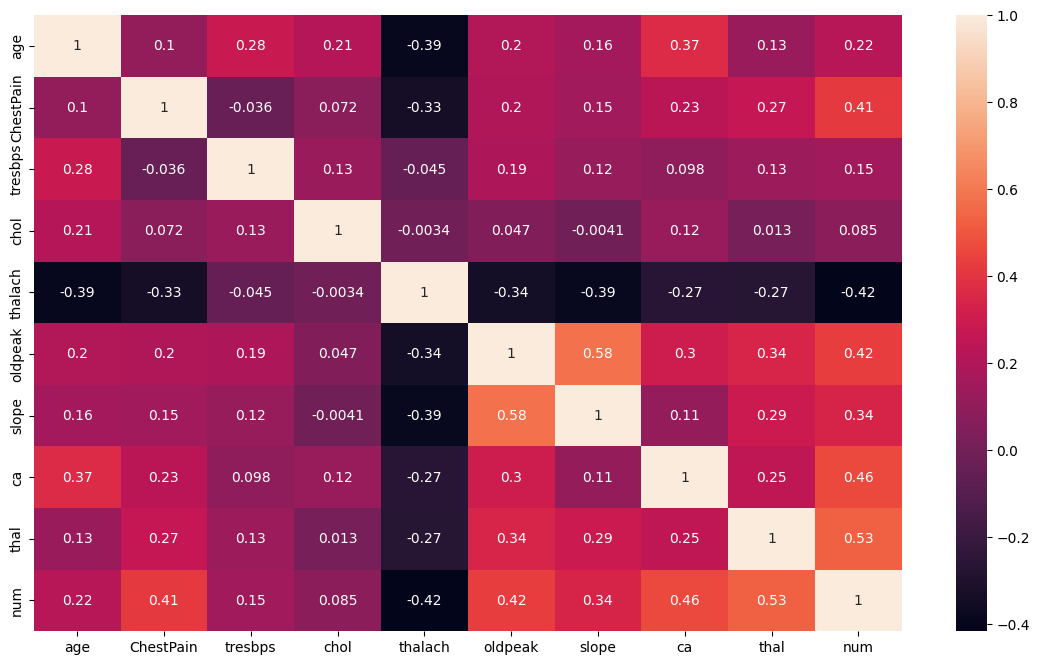

In [184]:
plt.figure(figsize=(14,8) ,dpi=100)

sns.heatmap(df.corr(numeric_only=True) , annot = True);

In [185]:
df['fbs'].value_counts() # We can drop maybe.

fbs
0.0    258
1.0     45
Name: count, dtype: int64

# Utils

In [186]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score , confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score , roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from imblearn.over_sampling import SMOTE , ADASYN


class fonks:
    """
    Class'ın amacı:
    - Sıkça kullanılacak fonksiyonları oluşturmak ve kolayca çağırmak.
    - Daha düzenli ve değiştirilebilir bir programlama yapmak.
    """
    
    label = 'Fertility'
    
    def overSample(X , y , tactic = 'smote'):
        if tactic == 'smote':
            smote = SMOTE()
            X_resampled , y_resampled = smote.fit_resample(X , y)
            return X_resampled , y_resampled
        elif tactic == 'adasyn':
            adasyn = ADASYN()
            X_resampled , y_resampled = adasyn.fit_resample(X , y)
            return X_resampled , y_resampled
            
    
    def trainTest(X , y , test_size = 0.2 , stratify = None):
        """
        Alınan datayı istenen oranda Train & Test şeklinde bölüp X_train , X_test , y_train , y_test adındaki 4 değişken döndürür.

        Parameters
        ----------
        data : pandas.DataFrame
            Train & Test olarak bölünecek veri seti.
        label : str, optional
            Hedef değişkenin adı, by default 'Knowledge'.
        test_size : float, optional
            Test veri setinin boyutu, by default 0.2.

        Returns
        -------
        tuple
            X_train, X_test, y_train, y_test
        """

        if stratify == 'y' :
            X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=test_size , random_state=53 , stratify=y)
        else :
            X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=test_size , random_state=53)
        
        return X_train, X_test, y_train,y_test


    def simple_scores(y_train, y_train_pred, y_test, y_pred, name='Model' , task = 'class'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Alınan acc, f1 ve precision skorlarını yazdırır.
        Hem Regression hem Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional, default 'reg'
            Görevin type'ı 'reg' or 'class'
            
        Returns
        -------
        print
            Train Acc , Train F1 , Train Precision , Test Acc , Test F1 , Test Precision
        """
        
        
        if task == 'class':
            print(f'{name} Train Accuracy : {accuracy_score(y_train , y_train_pred)}')
            print(f'{name} Train Recall : {recall_score(y_train, y_train_pred, pos_label=1)}')
            print(f'{name} Train Precision : {precision_score(y_train , y_train_pred, pos_label=1)}')
            print(f'{name} Train F1 : {f1_score(y_train , y_train_pred , pos_label=1)}')
            
            
            print("\n****************\n")
            
            print(f'{name} Test Accuracy : {accuracy_score(y_test , y_pred)}')
            print(f'{name} Test Recall : {recall_score(y_test, y_pred, pos_label=1)}')
            print(f'{name} Test Precision : {precision_score(y_test , y_pred, pos_label=1)}')
            print(f'{name} Test F1 : {f1_score(y_test , y_pred, pos_label=1)}')
        elif task == 'reg':
            print(f'{name} Train R2 : {r2_score(y_train , y_train_pred)}')
            print(f'{name} Train Mae : {mean_absolute_error(y_train, y_train_pred)}')
            print(f'{name} Train RMSE : {mean_squared_error(y_train , y_train_pred)**0.5}')
            print(f'{name} Train MSE : {mean_squared_error(y_train , y_train_pred)}')
            
            
            print("\n****************\n")
            
            print(f'{name} Test R2 : {r2_score(y_test , y_pred)}')
            print(f'{name} Test Mae : {mean_absolute_error(y_test, y_pred)}')
            print(f'{name} Test RMSE : {mean_squared_error(y_test , y_pred)**0.5}')
            print(f'{name} Test MSE : {mean_squared_error(y_test , y_pred)}')
        
    def get_r2_score(y_true, y_pred):
        return r2_score(y_true,y_pred)
    def get_mae_score(y_true, y_pred):
        return mean_absolute_error(y_true,y_pred)
    def get_rmse_score(y_true, y_pred):
        return mean_squared_error(y_true,y_pred)**0.5
    def get_mse_score(y_true, y_pred):
        return mean_squared_error(y_true,y_pred)
        
        
    def get_acc_score(y_true, y_pred):
        return accuracy_score(y_true , y_pred)    
    def get_f1_score(y_true, y_pred):
        return f1_score(y_true , y_pred , pos_label=1)
    
    def get_recall(y_true, y_pred):
        return recall_score(y_true, y_pred, pos_label=1)
    
    def get_roc_auc(y_true, y_pred , binary=True):
        if binary:
            return accuracy_score(y_true,y_pred)
        else:
            return roc_auc_score(y_true, y_pred, pos_label=1)
    
    
    def eval_metric(y_train, y_train_pred, y_test, y_pred, name='Model'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Confusion_matrix ve Classification_report'u yazdırır..
        Sadece Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_test_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional, default 'reg'
            Görevin type'ı 'reg' or 'class'            
            
        Returns
        -------
        print
            Train Confusion_matrix , Train Classification_report , Test Confusion_matrix , Test Classification_report
        """
        
        print(f"Test_Set {name}")
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print()
        print(f"Train_Set {name}")
        print(confusion_matrix(y_train, y_train_pred))
        print(classification_report(y_train, y_train_pred))         
        
    

    def train_test_df(y_train, y_train_pred, y_test, y_pred, name='Model' , task='class'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Accuracy, Recall, Precision,  yazdırır..
        Hem Regression hem Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_test_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional, default 'reg'
            Datamızın task'i, 'reg' or 'class'
            
        Returns
        -------
        print
            Train Accuracy , Train Recall , Train Precision , Train F1 , Test Accuracy , Test Recall , Test Precision , Test F1
        """
        
        
        if task == 'class':
            scores = {name+"_train": {"Accuracy" : accuracy_score(y_train, y_train_pred),
            "Recall" : recall_score(y_train, y_train_pred , pos_label=1),
            "Precision" : precision_score(y_train, y_train_pred , pos_label=1),
            "F1" : np.sqrt(f1_score(y_train, y_train_pred , pos_label=1))},
                    
            name+"_test": {"Accuracy" : accuracy_score(y_test, y_pred),
            "Recall" : recall_score(y_test, y_pred , pos_label=1),
            "Precision" : precision_score(y_test, y_pred , pos_label=1),
            "F1" : np.sqrt(f1_score(y_test, y_pred , pos_label=1))}}
            return pd.DataFrame(scores)
        
        
        
        if task == 'reg':
            
            scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
            "mae" : mean_absolute_error(y_train, y_train_pred),
            "mse" : mean_squared_error(y_train, y_train_pred),
            "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
                    
            name+"_test": {"R2" : r2_score(y_test, y_pred),
            "mae" : mean_absolute_error(y_test, y_pred),
            "mse" : mean_squared_error(y_test, y_pred),
            "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
            return pd.DataFrame(scores)

# X and y

In [187]:
X = df.drop('num' , axis = 1)
y = df['num']

# OverSample

In [188]:
# Dont need.

# Train | Test Split

In [189]:
X_train , X_test , y_train , y_test = fonks.trainTest(X , y,test_size=0.2)

# Models

### Gaussian NB

In [26]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

nb_train_pred = nb.predict(X_train)
nb_pred = nb.predict(X_test)

fonks.simple_scores(y_train, nb_train_pred , y_test , nb_pred)

Model Train Accuracy : 0.8388429752066116
Model Train Recall : 0.7747747747747747
Model Train Precision : 0.86
Model Train F1 : 0.8151658767772512

****************

Model Test Accuracy : 0.8688524590163934
Model Test Recall : 0.8571428571428571
Model Test Precision : 0.8571428571428571
Model Test F1 : 0.8571428571428571


In [27]:
fonks.eval_metric(y_train, nb_train_pred , y_test , nb_pred , 'NB')

Test_Set NB
[[29  4]
 [ 4 24]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        33
           1       0.86      0.86      0.86        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61


Train_Set NB
[[117  14]
 [ 25  86]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       131
           1       0.86      0.77      0.82       111

    accuracy                           0.84       242
   macro avg       0.84      0.83      0.84       242
weighted avg       0.84      0.84      0.84       242



In [28]:
nb_acc = fonks.get_acc_score(y_test , nb_pred)
nb_f1 = fonks.get_f1_score(y_test , nb_pred )
nb_recall = fonks.get_recall(y_test , nb_pred)
nb_rocauc = fonks.get_roc_auc(y_test , nb_pred)
# nb_rocauc = roc_auc_score(y_test, nb_pred, multi_class='ovo')
# nb_rocauc = 0.98

nb_df = fonks.train_test_df(y_train, nb_train_pred , y_test , nb_pred , 'NB')
nb_df

,NB_train,NB_test
Accuracy,0.838843,0.868852
Recall,0.774775,0.857143
Precision,0.860000,0.857143
F1,0.902865,0.925820


## Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import dpctl
from sklearnex import patch_sklearn, config_context , unpatch_sklearn

patch_sklearn()

with config_context(target_offload = 'gpu:0'):
    dt_base = DecisionTreeClassifier()

    params = {'max_depth' : np.arange(2,11) , 'min_samples_split' : np.arange(2,8) , 'max_features' : np.arange(2,10)}

    dt_grid = GridSearchCV(dt_base , params , scoring='accuracy' , cv = 5) 
    dt_grid.fit(X_train , y_train)

print(f'Best parameters: {dt_grid.best_params_}')
print(f'Best score: {dt_grid.best_score_:.2f}')

unpatch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Best parameters: {'max_depth': 3, 'max_features': 8, 'min_samples_split': 7}
Best score: 0.81


In [30]:
from sklearn.tree import DecisionTreeClassifier

# dt = DecisionTreeClassifier(max_depth= 3 , max_features= 6 , min_samples_split= 3)
dt = dt_grid.best_estimator_
dt.fit(X_train, y_train)

dt_train_pred = dt.predict(X_train)
dt_pred = dt.predict(X_test)

fonks.simple_scores(y_train, dt_train_pred , y_test , dt_pred)

Model Train Accuracy : 0.8512396694214877
Model Train Recall : 0.7657657657657657
Model Train Precision : 0.8947368421052632
Model Train F1 : 0.825242718446602

****************

Model Test Accuracy : 0.7377049180327869
Model Test Recall : 0.6785714285714286
Model Test Precision : 0.7307692307692307
Model Test F1 : 0.7037037037037038


In [31]:
fonks.eval_metric(y_train, dt_train_pred , y_test , dt_pred , 'DT')

Test_Set DT
[[26  7]
 [ 9 19]]
              precision    recall  f1-score   support

           0       0.74      0.79      0.76        33
           1       0.73      0.68      0.70        28

    accuracy                           0.74        61
   macro avg       0.74      0.73      0.73        61
weighted avg       0.74      0.74      0.74        61


Train_Set DT
[[121  10]
 [ 26  85]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       131
           1       0.89      0.77      0.83       111

    accuracy                           0.85       242
   macro avg       0.86      0.84      0.85       242
weighted avg       0.86      0.85      0.85       242



In [32]:
dt_acc = fonks.get_acc_score(y_test , dt_pred)
dt_f1 = fonks.get_f1_score(y_test , dt_pred)
dt_recall = fonks.get_recall(y_test , dt_pred)
dt_rocauc = fonks.get_roc_auc(y_test , dt_pred)
# dt_rocauc = roc_auc_score(np.array(y_test.values), dt_pred, multi_class='ovr' , average='micro')

dt_df = fonks.train_test_df(y_train, dt_train_pred , y_test , dt_pred , 'DT')
all_df = pd.concat([nb_df , dt_df] , axis = 1)
all_df

,NB_train,NB_test,DT_train,DT_test
Accuracy,0.838843,0.868852,0.851240,0.737705
Recall,0.774775,0.857143,0.765766,0.678571
Precision,0.860000,0.857143,0.894737,0.730769
F1,0.902865,0.925820,0.908429,0.838870


## KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(5)

knn.fit(X_train, y_train)

knn_train_pred = knn.predict(X_train)
knn_pred = knn.predict(X_test)

fonks.simple_scores(y_train, knn_train_pred , y_test , knn_pred)

Model Train Accuracy : 0.7727272727272727
Model Train Recall : 0.7117117117117117
Model Train Precision : 0.7745098039215687
Model Train F1 : 0.7417840375586854

****************

Model Test Accuracy : 0.7049180327868853
Model Test Recall : 0.5714285714285714
Model Test Precision : 0.7272727272727273
Model Test F1 : 0.64


In [34]:
fonks.eval_metric(y_train, knn_train_pred , y_test , knn_pred , 'KNN')

Test_Set KNN
[[27  6]
 [12 16]]
              precision    recall  f1-score   support

           0       0.69      0.82      0.75        33
           1       0.73      0.57      0.64        28

    accuracy                           0.70        61
   macro avg       0.71      0.69      0.70        61
weighted avg       0.71      0.70      0.70        61


Train_Set KNN
[[108  23]
 [ 32  79]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.80       131
           1       0.77      0.71      0.74       111

    accuracy                           0.77       242
   macro avg       0.77      0.77      0.77       242
weighted avg       0.77      0.77      0.77       242



In [35]:
knn_acc = fonks.get_acc_score(y_test , knn_pred)
knn_f1 = fonks.get_f1_score(y_test , knn_pred)
knn_recall = fonks.get_recall(y_test , knn_pred )
knn_rocauc = fonks.get_roc_auc(y_test , knn_pred)

knn_df = fonks.train_test_df(y_train, knn_train_pred , y_test , knn_pred , 'KNN')
all_df = pd.concat([all_df , knn_df] , axis = 1)
all_df

,NB_train,NB_test,DT_train,DT_test,KNN_train,KNN_test
Accuracy,0.838843,0.868852,0.851240,0.737705,0.772727,0.704918
Recall,0.774775,0.857143,0.765766,0.678571,0.711712,0.571429
Precision,0.860000,0.857143,0.894737,0.730769,0.774510,0.727273
F1,0.902865,0.925820,0.908429,0.838870,0.861269,0.800000


## LogisticRegression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearnex import patch_sklearn, config_context , unpatch_sklearn
import dpctl

patch_sklearn()

with config_context(target_offload='gpu:0'):
        log_base = LogisticRegression(random_state= 53 , max_iter= 1000000)

        params = {'penalty' : ['l1' , 'l2'] , 'C' : [0.001 , 0.01 , 0.1 , 1 , 3, 5, 10 ,25, 50 , 100 , 200 , 300 , 500 ,750] ,
                'solver' : ['lbfgs' , 'liblinear']}

        log_grid = RandomizedSearchCV(log_base , params , scoring='accuracy' , cv = 5 , n_iter=50)
        log_grid.fit(X_train , y_train)

print(f'Best parameters: {log_grid.best_params_}')
print(f'Best score: {log_grid.best_score_:.2f}')

unpatch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Best parameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 3}
Best score: 0.85


c:\Users\Emincan\miniconda3\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
125 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Emincan\miniconda3\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Emincan\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, prefer=prefer)(
  File "c:\Users\Emincan\miniconda3\envs\ml\lib\site-packages\sklearn\utils\parallel.

In [37]:
from sklearn.linear_model import LogisticRegression

# log = LogisticRegression(solver = 'liblinear' , penalty= 'l1' , C= 3 , max_iter=10000) 
log = log_grid.best_estimator_
log.fit(X_train , y_train)

log_train_pred = log.predict(X_train)
log_pred = log.predict(X_test)

fonks.simple_scores(y_train, log_train_pred , y_test , log_pred , 'Log')

Log Train Accuracy : 0.8636363636363636
Log Train Recall : 0.8198198198198198
Log Train Precision : 0.875
Log Train F1 : 0.8465116279069766

****************

Log Test Accuracy : 0.819672131147541
Log Test Recall : 0.8214285714285714
Log Test Precision : 0.7931034482758621
Log Test F1 : 0.8070175438596492


In [38]:
fonks.eval_metric(y_train, log_train_pred , y_test , log_pred , 'Log')

Test_Set Log
[[27  6]
 [ 5 23]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        33
           1       0.79      0.82      0.81        28

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61


Train_Set Log
[[118  13]
 [ 20  91]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       131
           1       0.88      0.82      0.85       111

    accuracy                           0.86       242
   macro avg       0.87      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242



In [39]:
log_acc = fonks.get_acc_score(y_test , log_pred)
log_f1 = fonks.get_f1_score(y_test , log_pred)
log_recall = fonks.get_recall(y_test , log_pred)
log_rocauc = fonks.get_roc_auc(y_test , log_pred)

log_df = fonks.train_test_df(y_train, log_train_pred , y_test , log_pred , 'Log')
all_df = pd.concat([all_df, log_df] , axis = 1)
all_df 

,NB_train,NB_test,DT_train,DT_test,KNN_train,KNN_test,Log_train,Log_test
Accuracy,0.838843,0.868852,0.851240,0.737705,0.772727,0.704918,0.863636,0.819672
Recall,0.774775,0.857143,0.765766,0.678571,0.711712,0.571429,0.819820,0.821429
Precision,0.860000,0.857143,0.894737,0.730769,0.774510,0.727273,0.875000,0.793103
F1,0.902865,0.925820,0.908429,0.838870,0.861269,0.800000,0.920061,0.898342


## SVC

In [40]:
# from sklearn.svm import SVC
# from sklearnex import patch_sklearn, config_context

# patch_sklearn()

# with config_context(target_offload='gpu:0'):

#     svc_base = SVC(random_state= 53)

#     params = {'kernel' : ['linear' , 'poly' , 'rbf'] , 'degree' : [2,3] , 'gamma' : ['scale' , 'auto'] , 'C' : np.arange(0.01,100,10) }

#     svc_grid = GridSearchCV(svc_base , params , scoring='accuracy' , cv = 3)
#     svc_grid.fit(X_train,y_train)

# print(f'Best parameters: {svc_grid.best_params_}')
# print(f'Best score: {svc_grid.best_score_:.2f}')

# unpatch_sklearn()

In [41]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear' , gamma= 'scale' , C= 0.01 , degree= 2 , max_iter= 10000) 
# svc = svc_grid.best_estimator_
svc.fit(X_train , y_train)

svc_train_pred = svc.predict(X_train)
svc_pred = svc.predict(X_test)

fonks.simple_scores(y_train, svc_train_pred , y_test , svc_pred , 'SVC')

SVC Train Accuracy : 0.8347107438016529
SVC Train Recall : 0.8018018018018018
SVC Train Precision : 0.8317757009345794
SVC Train F1 : 0.8165137614678899

****************

SVC Test Accuracy : 0.8360655737704918
SVC Test Recall : 0.7857142857142857
SVC Test Precision : 0.8461538461538461
SVC Test F1 : 0.8148148148148148


c:\Users\Emincan\miniconda3\envs\ml\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [42]:
fonks.eval_metric(y_train, svc_train_pred , y_test , svc_pred , 'SVC')

Test_Set SVC
[[29  4]
 [ 6 22]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        33
           1       0.85      0.79      0.81        28

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61


Train_Set SVC
[[113  18]
 [ 22  89]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       131
           1       0.83      0.80      0.82       111

    accuracy                           0.83       242
   macro avg       0.83      0.83      0.83       242
weighted avg       0.83      0.83      0.83       242



In [43]:
svc_acc = fonks.get_acc_score(y_test , svc_pred)
svc_f1 = fonks.get_f1_score(y_test , svc_pred)
svc_recall = fonks.get_recall(y_test , svc_pred)
svc_rocauc = fonks.get_roc_auc(y_test , svc_pred)

svc_df = fonks.train_test_df(y_train, svc_train_pred , y_test , svc_pred , 'SVC')
all_df = pd.concat([all_df, svc_df] , axis = 1)
all_df 

,NB_train,NB_test,DT_train,DT_test,KNN_train,KNN_test,Log_train,Log_test,SVC_train,SVC_test
Accuracy,0.838843,0.868852,0.851240,0.737705,0.772727,0.704918,0.863636,0.819672,0.834711,0.836066
Recall,0.774775,0.857143,0.765766,0.678571,0.711712,0.571429,0.819820,0.821429,0.801802,0.785714
Precision,0.860000,0.857143,0.894737,0.730769,0.774510,0.727273,0.875000,0.793103,0.831776,0.846154
F1,0.902865,0.925820,0.908429,0.838870,0.861269,0.800000,0.920061,0.898342,0.903612,0.902671


## Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearnex import patch_sklearn, unpatch_sklearn,config_context

patch_sklearn()

with config_context(target_offload='gpu:0'):
    rf_base = RandomForestClassifier(random_state= 53)

    params = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt',2,3,4]
    }


    rf_grid = GridSearchCV(rf_base , params , scoring='accuracy' , cv = 3)
    rf_grid.fit(X_train,y_train)

print(f'Best parameters: {rf_grid.best_params_}')
print(f'Best score: {rf_grid.best_score_:.2f}')

unpatch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Best parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}
Best score: 0.85


In [45]:
from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(n_estimators = 500 , max_features= 'sqrt' , max_depth = 5 , min_samples_split=10 , min_samples_leaf=1)
rf = rf_grid.best_estimator_
rf.fit(X_train , y_train)

rf_train_pred = rf.predict(X_train)
rf_pred = rf.predict(X_test)

fonks.simple_scores(y_train, rf_train_pred , y_test , rf_pred , 'RF')

RF Train Accuracy : 0.9256198347107438
RF Train Recall : 0.8918918918918919
RF Train Precision : 0.9428571428571428
RF Train F1 : 0.9166666666666667

****************

RF Test Accuracy : 0.8524590163934426
RF Test Recall : 0.8214285714285714
RF Test Precision : 0.8518518518518519
RF Test F1 : 0.8363636363636364


In [46]:
fonks.eval_metric(y_train, rf_train_pred , y_test , rf_pred , 'RF')

Test_Set RF
[[29  4]
 [ 5 23]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        33
           1       0.85      0.82      0.84        28

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


Train_Set RF
[[125   6]
 [ 12  99]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       131
           1       0.94      0.89      0.92       111

    accuracy                           0.93       242
   macro avg       0.93      0.92      0.92       242
weighted avg       0.93      0.93      0.93       242



In [47]:
rf_acc = fonks.get_acc_score(y_test , rf_pred)
rf_f1 = fonks.get_f1_score(y_test , rf_pred)
rf_recall = fonks.get_recall(y_test , rf_pred)
rf_rocauc = fonks.get_roc_auc(y_test , rf_pred)

rf_df = fonks.train_test_df(y_train, rf_train_pred , y_test , rf_pred , 'RF')
all_df = pd.concat([all_df, rf_df] , axis = 1)
all_df 

,NB_train,NB_test,DT_train,DT_test,KNN_train,KNN_test,Log_train,Log_test,SVC_train,SVC_test,RF_train,RF_test
Accuracy,0.838843,0.868852,0.851240,0.737705,0.772727,0.704918,0.863636,0.819672,0.834711,0.836066,0.925620,0.852459
Recall,0.774775,0.857143,0.765766,0.678571,0.711712,0.571429,0.819820,0.821429,0.801802,0.785714,0.891892,0.821429
Precision,0.860000,0.857143,0.894737,0.730769,0.774510,0.727273,0.875000,0.793103,0.831776,0.846154,0.942857,0.851852
F1,0.902865,0.925820,0.908429,0.838870,0.861269,0.800000,0.920061,0.898342,0.903612,0.902671,0.957427,0.914529


## Gradient Boosting

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
import dpctl
from sklearnex import patch_sklearn, config_context

patch_sklearn()

with config_context(target_offload='gpu:0'):
        gb_base = GradientBoostingClassifier()

        params = {'learning_rate' : [0.001,0.01,0.1,1],
                'n_estimators' : [80 , 100 , 150 , 200 , 300 , 400 , 500],
                'min_samples_split' : np.arange(2,7),
                'max_depth' : np.arange(2,10),
                }

        gb_rand = RandomizedSearchCV(gb_base , params , scoring='accuracy' , cv = 3 , n_iter= 150)
        gb_rand.fit(X_train,y_train)


print(f'Best parameters: {gb_rand.best_params_}')
print(f'Best score: {gb_rand.best_score_:.2f}')

unpatch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Best parameters: {'n_estimators': 80, 'min_samples_split': 2, 'max_depth': 2, 'learning_rate': 0.1}
Best score: 0.83


In [49]:
from sklearn.ensemble import GradientBoostingClassifier

# gb = GradientBoostingClassifier(n_estimators=200 , min_samples_split=5, max_depth=6 , learning_rate= 1)
gb = gb_rand.best_estimator_
gb.fit(X_train , y_train)

gb_train_pred = gb.predict(X_train)
gb_pred = gb.predict(X_test)

fonks.simple_scores(y_train, gb_train_pred , y_test , gb_pred , 'GB')

GB Train Accuracy : 0.9504132231404959
GB Train Recall : 0.9279279279279279
GB Train Precision : 0.9626168224299065
GB Train F1 : 0.944954128440367

****************

GB Test Accuracy : 0.8360655737704918
GB Test Recall : 0.7857142857142857
GB Test Precision : 0.8461538461538461
GB Test F1 : 0.8148148148148148


In [50]:
fonks.eval_metric(y_train, gb_train_pred , y_test , gb_pred , 'GB')

Test_Set GB
[[29  4]
 [ 6 22]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        33
           1       0.85      0.79      0.81        28

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61


Train_Set GB
[[127   4]
 [  8 103]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       131
           1       0.96      0.93      0.94       111

    accuracy                           0.95       242
   macro avg       0.95      0.95      0.95       242
weighted avg       0.95      0.95      0.95       242



In [51]:
gb_acc = fonks.get_acc_score(y_test , gb_pred)
gb_f1 = fonks.get_f1_score(y_test , gb_pred)
gb_recall = fonks.get_recall(y_test , gb_pred)
gb_rocauc = fonks.get_roc_auc(y_test , gb_pred)

gb_df = fonks.train_test_df(y_train, gb_train_pred , y_test , gb_pred , 'GB')
all_df = pd.concat([all_df, gb_df] , axis = 1)
all_df 

,NB_train,NB_test,DT_train,DT_test,KNN_train,KNN_test,Log_train,Log_test,SVC_train,SVC_test,RF_train,RF_test,GB_train,GB_test
Accuracy,0.838843,0.868852,0.851240,0.737705,0.772727,0.704918,0.863636,0.819672,0.834711,0.836066,0.925620,0.852459,0.950413,0.836066
Recall,0.774775,0.857143,0.765766,0.678571,0.711712,0.571429,0.819820,0.821429,0.801802,0.785714,0.891892,0.821429,0.927928,0.785714
Precision,0.860000,0.857143,0.894737,0.730769,0.774510,0.727273,0.875000,0.793103,0.831776,0.846154,0.942857,0.851852,0.962617,0.846154
F1,0.902865,0.925820,0.908429,0.838870,0.861269,0.800000,0.920061,0.898342,0.903612,0.902671,0.957427,0.914529,0.972088,0.902671


## XGBoost

In [52]:
# y_train_xgb = y_train.replace({1:0 , 2:1 ,3:2 , 4:3}).astype(int)
# y_test_xgb = y_test.replace({1:0 , 2:1 ,3:2 , 4:3}).astype(int)

In [53]:
from xgboost import XGBClassifier
from sklearnex import patch_sklearn,config_context
import dpctl

patch_sklearn()

with config_context(target_offload="gpu:0"):
    xgb_base = XGBClassifier(tree_method="gpu_hist",
                             gpu_id=0,
                             enable_categorical = True)

    params = {'learning_rate' : [0.01,0.1,1],
            'n_estimators' : [80 , 100 , 150 , 200 , 300],
            'subsample': [0.5 , 0.7 , 0.8 , 1],
            'colsample_bytree' : [0.5 , 0.7 , 0.8 , 1],
            'max_depth' : np.arange(2,8),
            }

    xgb_grid = GridSearchCV(xgb_base , params , scoring='accuracy' , cv = 3)
    xgb_grid.fit(X_train,y_train)


print(f'Best parameters: {xgb_grid.best_params_}')
print(f'Best score: {xgb_grid.best_score_:.2f}')

unpatch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Best parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 200, 'subsample': 0.5}
Best score: 0.86


In [54]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 80 , learning_rate = 1 , max_depth = 3 , subsample = 0.8 , colsample_bytree = 0.5 , enable_categorical = True , tree_method="gpu_hist", gpu_id=0)
# xgb = xgb_grid.best_estimator_
xgb.fit(X_train, y_train)

xgb_train_pred = xgb.predict(X_train)
xgb_pred = xgb.predict(X_test)

fonks.simple_scores(y_train, xgb_train_pred , y_test , xgb_pred , 'XGB')

XGB Train Accuracy : 1.0
XGB Train Recall : 1.0
XGB Train Precision : 1.0
XGB Train F1 : 1.0

****************

XGB Test Accuracy : 0.7868852459016393
XGB Test Recall : 0.7857142857142857
XGB Test Precision : 0.7586206896551724
XGB Test F1 : 0.7719298245614034


In [55]:
fonks.eval_metric(y_train, xgb_train_pred , y_test , xgb_pred , 'XGB')

Test_Set XGB
[[26  7]
 [ 6 22]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        33
           1       0.76      0.79      0.77        28

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61


Train_Set XGB
[[131   0]
 [  0 111]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00       111

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [56]:
xgb_acc = fonks.get_acc_score(y_test , xgb_pred)
xgb_f1 = fonks.get_f1_score(y_test , xgb_pred)
xgb_recall = fonks.get_recall(y_test , xgb_pred)
xgb_rocauc = fonks.get_roc_auc(y_test , xgb_pred)

xgb_df = fonks.train_test_df(y_train, xgb_train_pred , y_test , xgb_pred , 'XGB')
all_df = pd.concat([all_df, xgb_df] , axis = 1)
all_df 

,NB_train,NB_test,DT_train,DT_test,KNN_train,KNN_test,Log_train,Log_test,SVC_train,SVC_test,RF_train,RF_test,GB_train,GB_test,XGB_train,XGB_test
Accuracy,0.838843,0.868852,0.851240,0.737705,0.772727,0.704918,0.863636,0.819672,0.834711,0.836066,0.925620,0.852459,0.950413,0.836066,1.0,0.786885
Recall,0.774775,0.857143,0.765766,0.678571,0.711712,0.571429,0.819820,0.821429,0.801802,0.785714,0.891892,0.821429,0.927928,0.785714,1.0,0.785714
Precision,0.860000,0.857143,0.894737,0.730769,0.774510,0.727273,0.875000,0.793103,0.831776,0.846154,0.942857,0.851852,0.962617,0.846154,1.0,0.758621
F1,0.902865,0.925820,0.908429,0.838870,0.861269,0.800000,0.920061,0.898342,0.903612,0.902671,0.957427,0.914529,0.972088,0.902671,1.0,0.878595


## LightGBM

In [57]:
from lightgbm import LGBMClassifier

patch_sklearn()

with config_context(target_offload='gpu:0'):
        lgb_base = LGBMClassifier(device = 'gpu')

        params = {
                'n_estimators': [100, 200, 300],
                'max_depth': [3, 5, 7 , 6 , 7, 8],
                'learning_rate': [1,0.1,0.01],
                'subsample': [0.7,0.8, 0.9, 1.0],
                'colsample_bytree': [0.8, 0.9, 1.0],
                }

        lgb_grid = GridSearchCV(lgb_base , params , scoring='accuracy' , cv = 3)
        lgb_grid.fit(X_train,y_train)


print(f'Best parameters: {lgb_grid.best_params_}')
print(f'Best score: {lgb_grid.best_score_:.2f}')

unpatch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Best parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Best score: 0.81


In [58]:
from lightgbm import LGBMClassifier

# lgb = LGBMClassifier(n_estimators= 100 , learning_rate = 1 , max_depth = 3 , subsample = 0.7 , colsample_bytree = 0.8)
lgb = lgb_grid.best_estimator_
lgb.fit(X_train , y_train)

lgb_train_pred = lgb.predict(X_train)
lgb_pred = lgb.predict(X_test)

fonks.simple_scores(y_train, lgb_train_pred , y_test , lgb_pred , 'LGB')

LGB Train Accuracy : 0.9752066115702479
LGB Train Recall : 0.9819819819819819
LGB Train Precision : 0.9646017699115044
LGB Train F1 : 0.9732142857142857

****************

LGB Test Accuracy : 0.8524590163934426
LGB Test Recall : 0.8214285714285714
LGB Test Precision : 0.8518518518518519
LGB Test F1 : 0.8363636363636364


In [59]:
fonks.eval_metric(y_train, lgb_train_pred , y_test , lgb_pred , 'LGB')

Test_Set LGB
[[29  4]
 [ 5 23]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        33
           1       0.85      0.82      0.84        28

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


Train_Set LGB
[[127   4]
 [  2 109]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       131
           1       0.96      0.98      0.97       111

    accuracy                           0.98       242
   macro avg       0.97      0.98      0.98       242
weighted avg       0.98      0.98      0.98       242



In [60]:
lgb_acc = fonks.get_acc_score(y_test , lgb_pred)
lgb_f1 = fonks.get_f1_score(y_test , lgb_pred)
lgb_recall = fonks.get_recall(y_test , lgb_pred)
lgb_rocauc = fonks.get_roc_auc(y_test , lgb_pred)

lgb_df = fonks.train_test_df(y_train, lgb_train_pred , y_test , lgb_pred , 'LGB')
all_df = pd.concat([all_df, lgb_df] , axis = 1)
all_df 

,NB_train,NB_test,DT_train,DT_test,KNN_train,KNN_test,Log_train,Log_test,SVC_train,SVC_test,RF_train,RF_test,GB_train,GB_test,XGB_train,XGB_test,LGB_train,LGB_test
Accuracy,0.838843,0.868852,0.851240,0.737705,0.772727,0.704918,0.863636,0.819672,0.834711,0.836066,0.925620,0.852459,0.950413,0.836066,1.0,0.786885,0.975207,0.852459
Recall,0.774775,0.857143,0.765766,0.678571,0.711712,0.571429,0.819820,0.821429,0.801802,0.785714,0.891892,0.821429,0.927928,0.785714,1.0,0.785714,0.981982,0.821429
Precision,0.860000,0.857143,0.894737,0.730769,0.774510,0.727273,0.875000,0.793103,0.831776,0.846154,0.942857,0.851852,0.962617,0.846154,1.0,0.758621,0.964602,0.851852
F1,0.902865,0.925820,0.908429,0.838870,0.861269,0.800000,0.920061,0.898342,0.903612,0.902671,0.957427,0.914529,0.972088,0.902671,1.0,0.878595,0.986516,0.914529


## Cat Boost

In [192]:
for col in cat_cols:
    X_train[col] = X_train[col].astype('int32')
    X_train[col] = X_train[col].astype('category')
    
    X_test[col] = X_test[col].astype('int32')
    X_test[col] = X_test[col].astype('category')


In [132]:
from catboost import CatBoostClassifier
from sklearnex import patch_sklearn , config_context

patch_sklearn()

with config_context(target_offload='gpu:0'):
        cb_base = CatBoostClassifier(task_type="GPU", devices='gpu:0' , cat_features=cat_cols)

        params = {
                'iterations': [100, 200, 300, 400],
                'depth': [3, 5, 7, 9],
                'learning_rate': [1, 0.1, 0.01, ],
                'random_seed': [53],
                }

        cb_grid = GridSearchCV(cb_base , params , scoring='accuracy' , cv = 3 )
        cb_grid.fit(X_train,y_train)


print(f'Best parameters: {cb_grid.best_params_}')
print(f'Best score: {cb_grid.best_score_:.2f}')

unpatch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


0:	learn: 0.4611532	total: 2.52ms	remaining: 250ms
1:	learn: 0.3554441	total: 5.33ms	remaining: 261ms
2:	learn: 0.3223669	total: 7.68ms	remaining: 248ms
3:	learn: 0.3045293	total: 9.65ms	remaining: 232ms
4:	learn: 0.2753075	total: 11.9ms	remaining: 227ms
5:	learn: 0.2658680	total: 13.9ms	remaining: 218ms
6:	learn: 0.2416348	total: 16.5ms	remaining: 219ms
7:	learn: 0.2192577	total: 18.5ms	remaining: 212ms
8:	learn: 0.2088119	total: 20.8ms	remaining: 211ms
9:	learn: 0.1904822	total: 22.8ms	remaining: 205ms
10:	learn: 0.1864938	total: 25.1ms	remaining: 203ms
11:	learn: 0.1836894	total: 27ms	remaining: 198ms
12:	learn: 0.1793426	total: 29.5ms	remaining: 198ms
13:	learn: 0.1748680	total: 31.5ms	remaining: 193ms
14:	learn: 0.1716059	total: 33.9ms	remaining: 192ms
15:	learn: 0.1655156	total: 36.4ms	remaining: 191ms
16:	learn: 0.1599687	total: 38.3ms	remaining: 187ms
17:	learn: 0.1552703	total: 40.8ms	remaining: 186ms
18:	learn: 0.1528110	total: 42.8ms	remaining: 182ms
19:	learn: 0.1507372	tot

In [194]:
from catboost import CatBoostClassifier

# cb = CatBoostClassifier(iterations= 100 , learning_rate = 0.1 , depth = 3  , eval_metric='Accuracy' , random_state= 53 , task_type="GPU", devices='gpu:0' )
cb = CatBoostClassifier(iterations= 400 , learning_rate = 0.01 , depth = 3  , eval_metric='Accuracy' , random_state= 53 , task_type="GPU", devices='gpu:0' , cat_features=cat_cols )
# cb = cb_grid.best_estimator_
cb.fit(X_train , y_train , eval_set= (X_test, y_test))

cb_train_pred = cb.predict(X_train)
cb_pred = cb.predict(X_test)

fonks.simple_scores(y_train, cb_train_pred , y_test , cb_pred , 'CatB')

0:	learn: 0.7809917	test: 0.7377049	best: 0.7377049 (0)	total: 7.74ms	remaining: 3.09s
1:	learn: 0.8553719	test: 0.8852459	best: 0.8852459 (1)	total: 14.8ms	remaining: 2.94s
2:	learn: 0.8471074	test: 0.8360656	best: 0.8852459 (1)	total: 21.5ms	remaining: 2.84s
3:	learn: 0.8512397	test: 0.8852459	best: 0.8852459 (1)	total: 28.6ms	remaining: 2.83s
4:	learn: 0.8512397	test: 0.9016393	best: 0.9016393 (4)	total: 36ms	remaining: 2.84s
5:	learn: 0.8512397	test: 0.9016393	best: 0.9016393 (4)	total: 42.9ms	remaining: 2.82s
6:	learn: 0.8512397	test: 0.9016393	best: 0.9016393 (4)	total: 49.6ms	remaining: 2.79s
7:	learn: 0.8512397	test: 0.8852459	best: 0.9016393 (4)	total: 57ms	remaining: 2.79s
8:	learn: 0.8471074	test: 0.9016393	best: 0.9016393 (4)	total: 64.4ms	remaining: 2.8s
9:	learn: 0.8429752	test: 0.9016393	best: 0.9016393 (4)	total: 71.7ms	remaining: 2.79s
10:	learn: 0.8429752	test: 0.9016393	best: 0.9016393 (4)	total: 78.5ms	remaining: 2.78s
11:	learn: 0.8471074	test: 0.9016393	best: 0.90

In [195]:
fonks.eval_metric(y_train, cb_train_pred , y_test , cb_pred , 'CatB')

Test_Set CatB
[[30  3]
 [ 3 25]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        33
           1       0.89      0.89      0.89        28

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61


Train_Set CatB
[[116  15]
 [ 21  90]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       131
           1       0.86      0.81      0.83       111

    accuracy                           0.85       242
   macro avg       0.85      0.85      0.85       242
weighted avg       0.85      0.85      0.85       242



In [196]:
cb_acc = fonks.get_acc_score(y_test , cb_pred)
cb_f1 = fonks.get_f1_score(y_test , cb_pred)
cb_recall = fonks.get_recall(y_test , cb_pred)
cb_rocauc = fonks.get_roc_auc(y_test , cb_pred)

cb_df = fonks.train_test_df(y_train, cb_train_pred , y_test , cb_pred , 'CatB')
all_df = pd.concat([all_df, cb_df] , axis = 1)
all_df 

,NB_train,NB_test,DT_train,DT_test,KNN_train,KNN_test,Log_train,Log_test,SVC_train,SVC_test,RF_train,RF_test,GB_train,GB_test,XGB_train,XGB_test,LGB_train,LGB_test,CatB_train,CatB_test
Accuracy,0.838843,0.868852,0.851240,0.737705,0.772727,0.704918,0.863636,0.819672,0.834711,0.836066,0.925620,0.852459,0.950413,0.836066,1.0,0.786885,0.975207,0.852459,0.851240,0.901639
Recall,0.774775,0.857143,0.765766,0.678571,0.711712,0.571429,0.819820,0.821429,0.801802,0.785714,0.891892,0.821429,0.927928,0.785714,1.0,0.785714,0.981982,0.821429,0.810811,0.892857
Precision,0.860000,0.857143,0.894737,0.730769,0.774510,0.727273,0.875000,0.793103,0.831776,0.846154,0.942857,0.851852,0.962617,0.846154,1.0,0.758621,0.964602,0.851852,0.857143,0.892857
F1,0.902865,0.925820,0.908429,0.838870,0.861269,0.800000,0.920061,0.898342,0.903612,0.902671,0.957427,0.914529,0.972088,0.902671,1.0,0.878595,0.986516,0.914529,0.912871,0.944911


# Compare Models

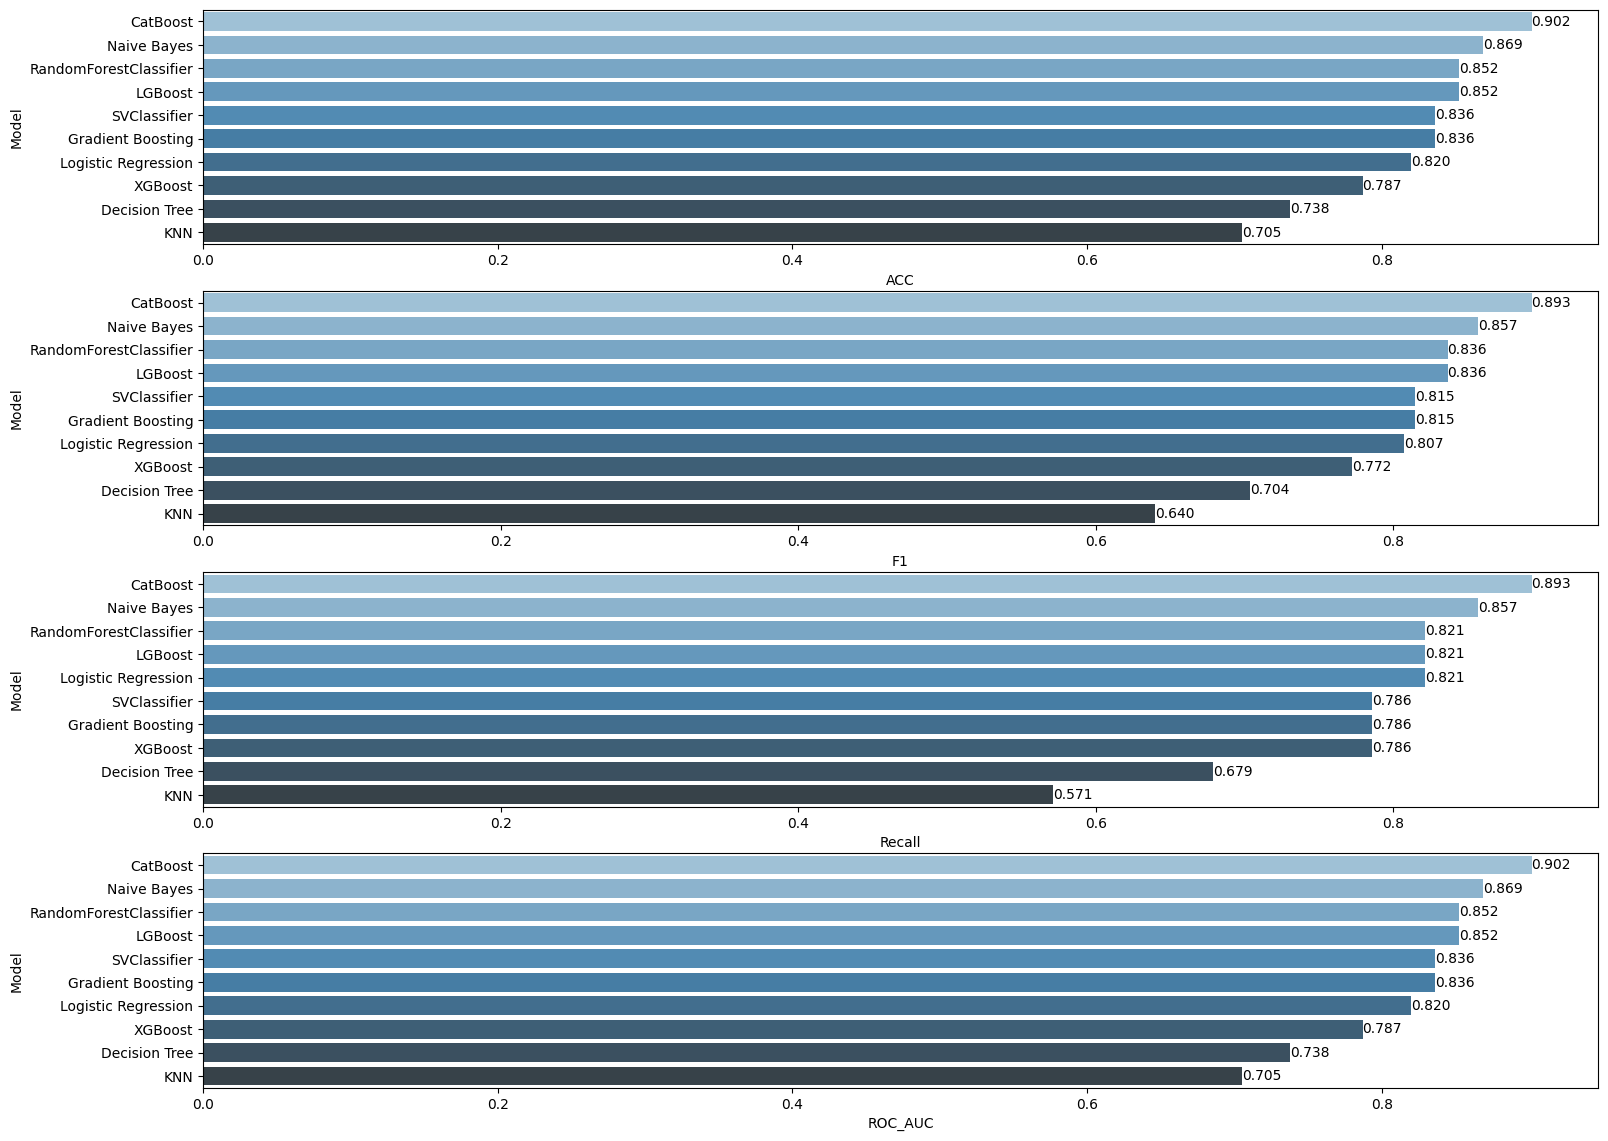

In [197]:
compare = pd.DataFrame({"Model": ["Naive Bayes", "Decision Tree", "KNN", "Logistic Regression", "SVClassifier", "RandomForestClassifier" ,"Gradient Boosting",
                                 "XGBoost", "LGBoost" , "CatBoost"],
                        "ACC": [nb_acc, dt_acc, knn_acc, log_acc, svc_acc, rf_acc, gb_acc, xgb_acc, lgb_acc, cb_acc],
                        "F1": [nb_f1, dt_f1, knn_f1, log_f1, svc_f1, rf_f1 , gb_f1, xgb_f1, lgb_f1 , cb_f1],
                        "Recall": [nb_recall, dt_recall, knn_recall, log_recall, svc_recall, rf_recall, gb_recall, xgb_recall, lgb_recall , cb_recall],
                        "ROC_AUC": [nb_rocauc, dt_rocauc, knn_rocauc, log_rocauc , svc_rocauc, rf_rocauc, gb_rocauc, xgb_rocauc, lgb_rocauc, cb_rocauc]
                        })

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(18,14))
plt.subplot(411)
compare = compare.sort_values(by="ACC", ascending=False)
ax=sns.barplot(x="ACC", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(412)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(413)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(414)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

In [ ]:
# CatBoost and Naive Bayes looks good.
# Cat boost is the best model for this. 0.885 Accuracy. 0.873 F1 . 0.857 Recall 
# CatBoost better with cat features.

In [ ]:
# Done.